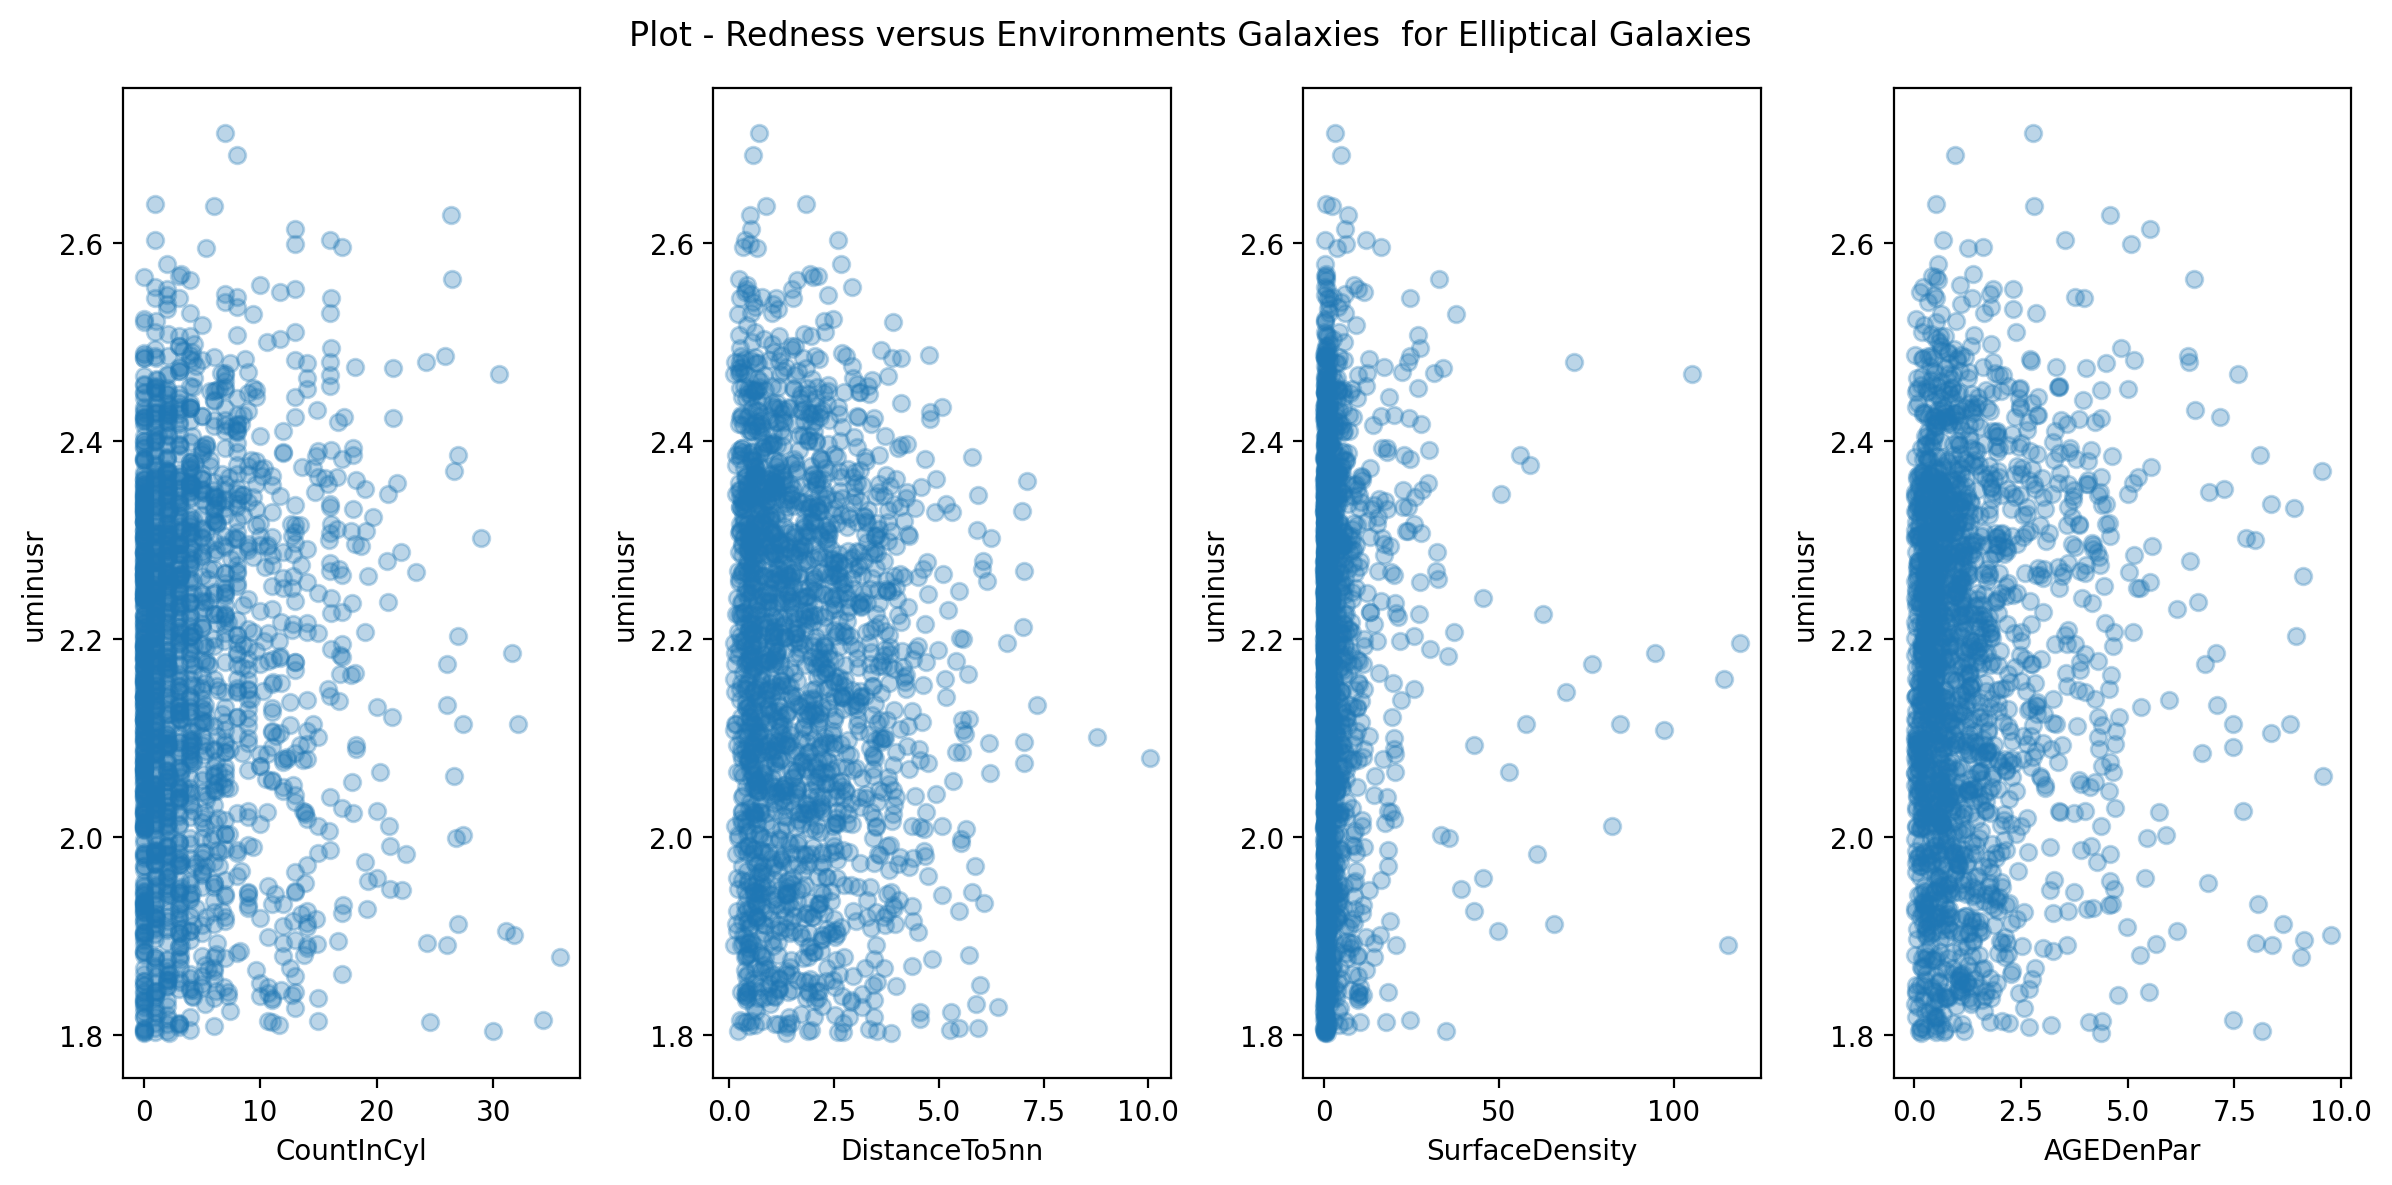

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_48637/1858526781.py:47: RuntimeWarning: divide by zero encountered in log
  x = np.log(RErange[xfield])


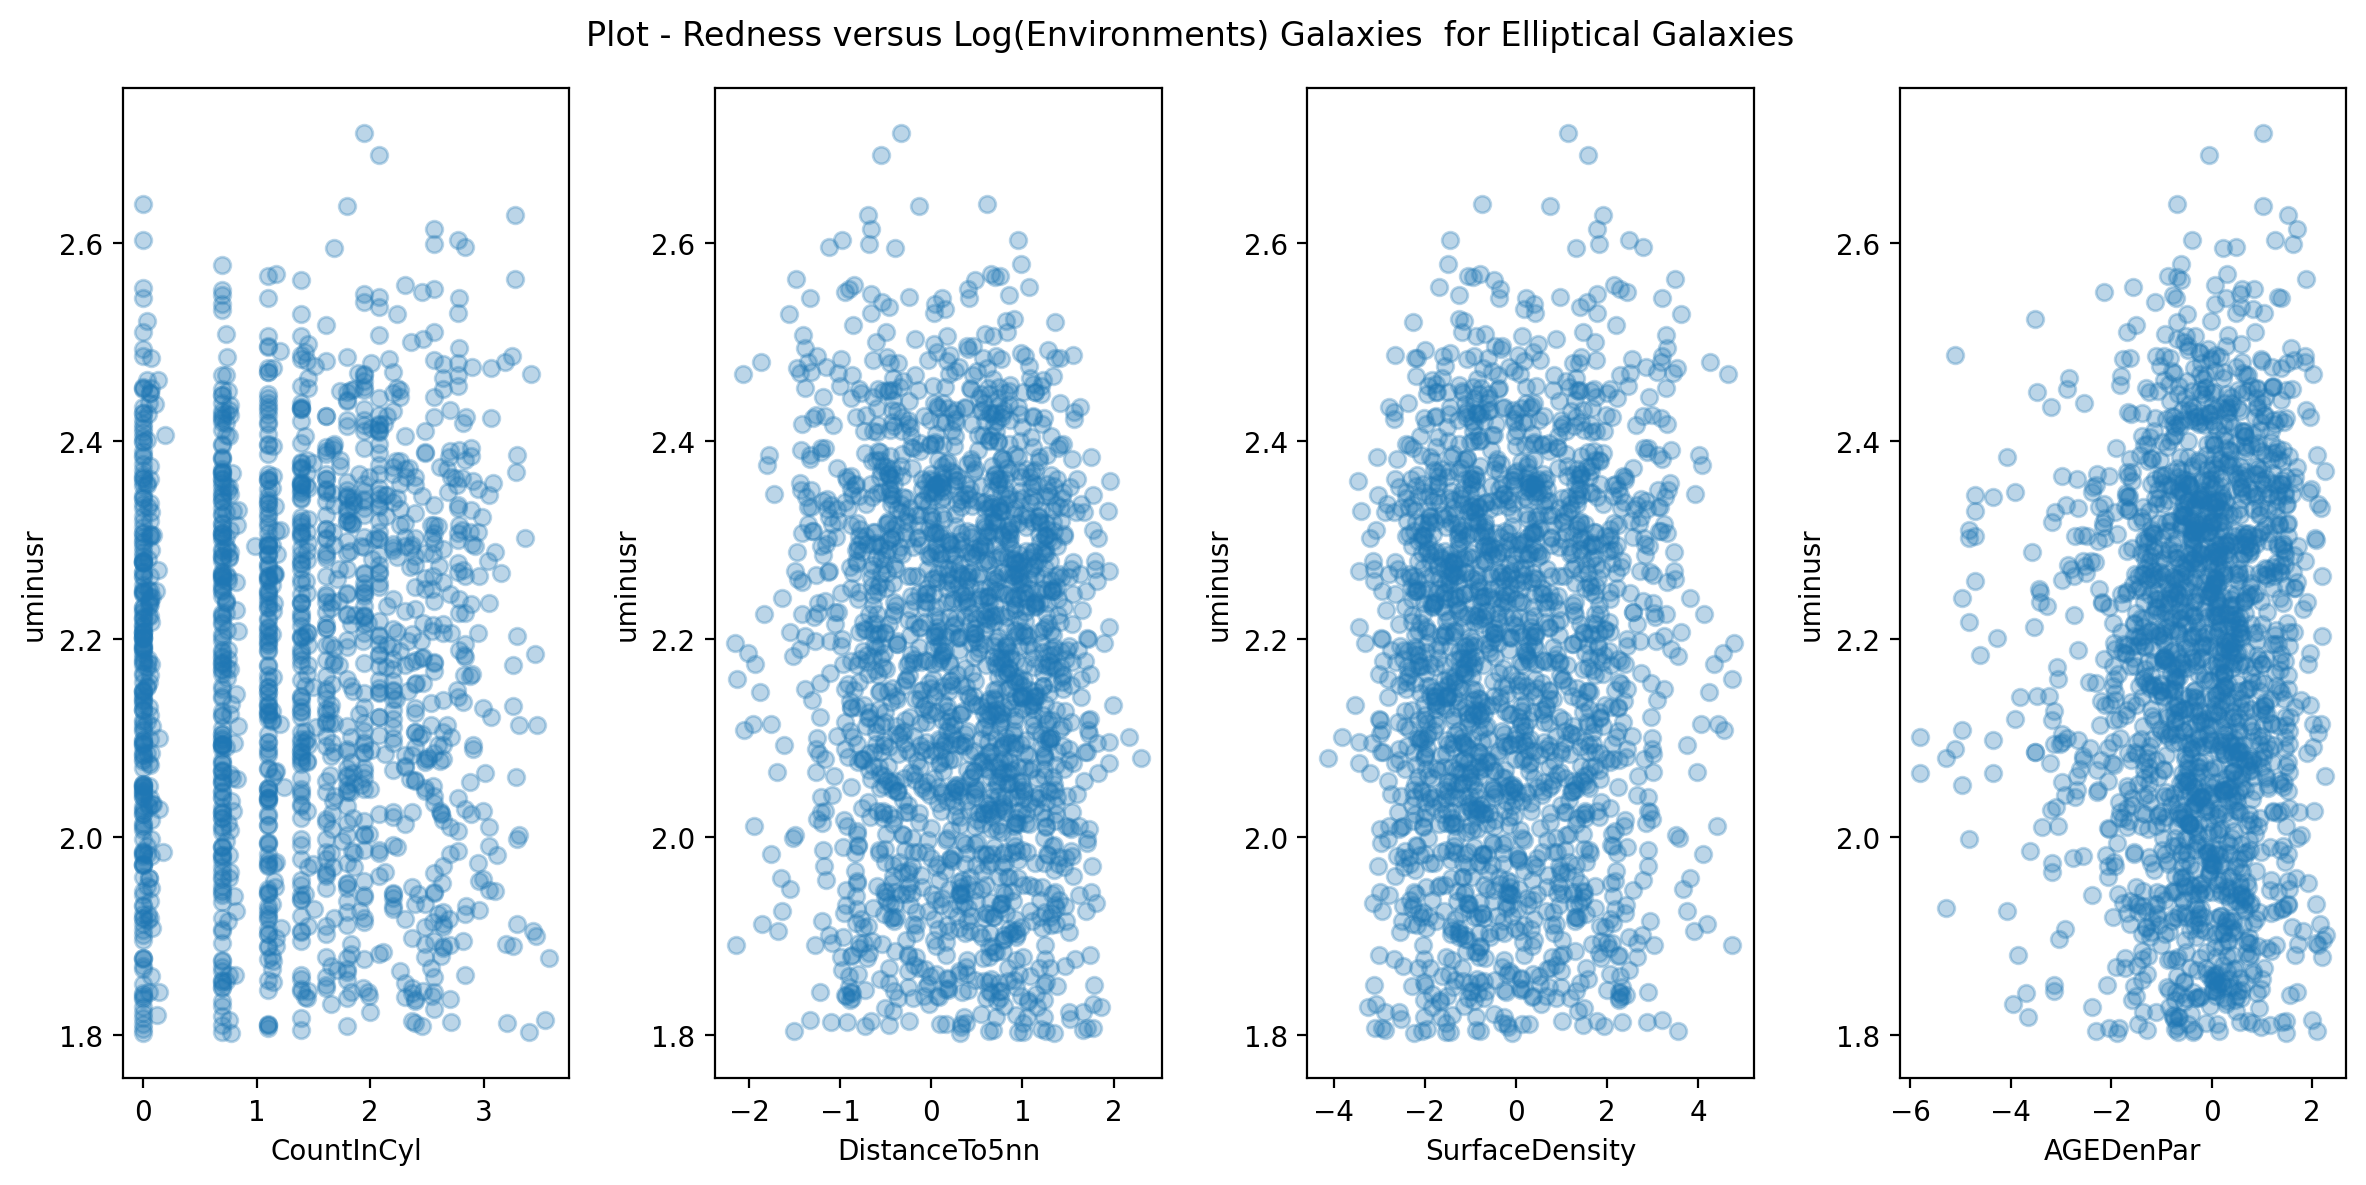

1.801203
2.7112923


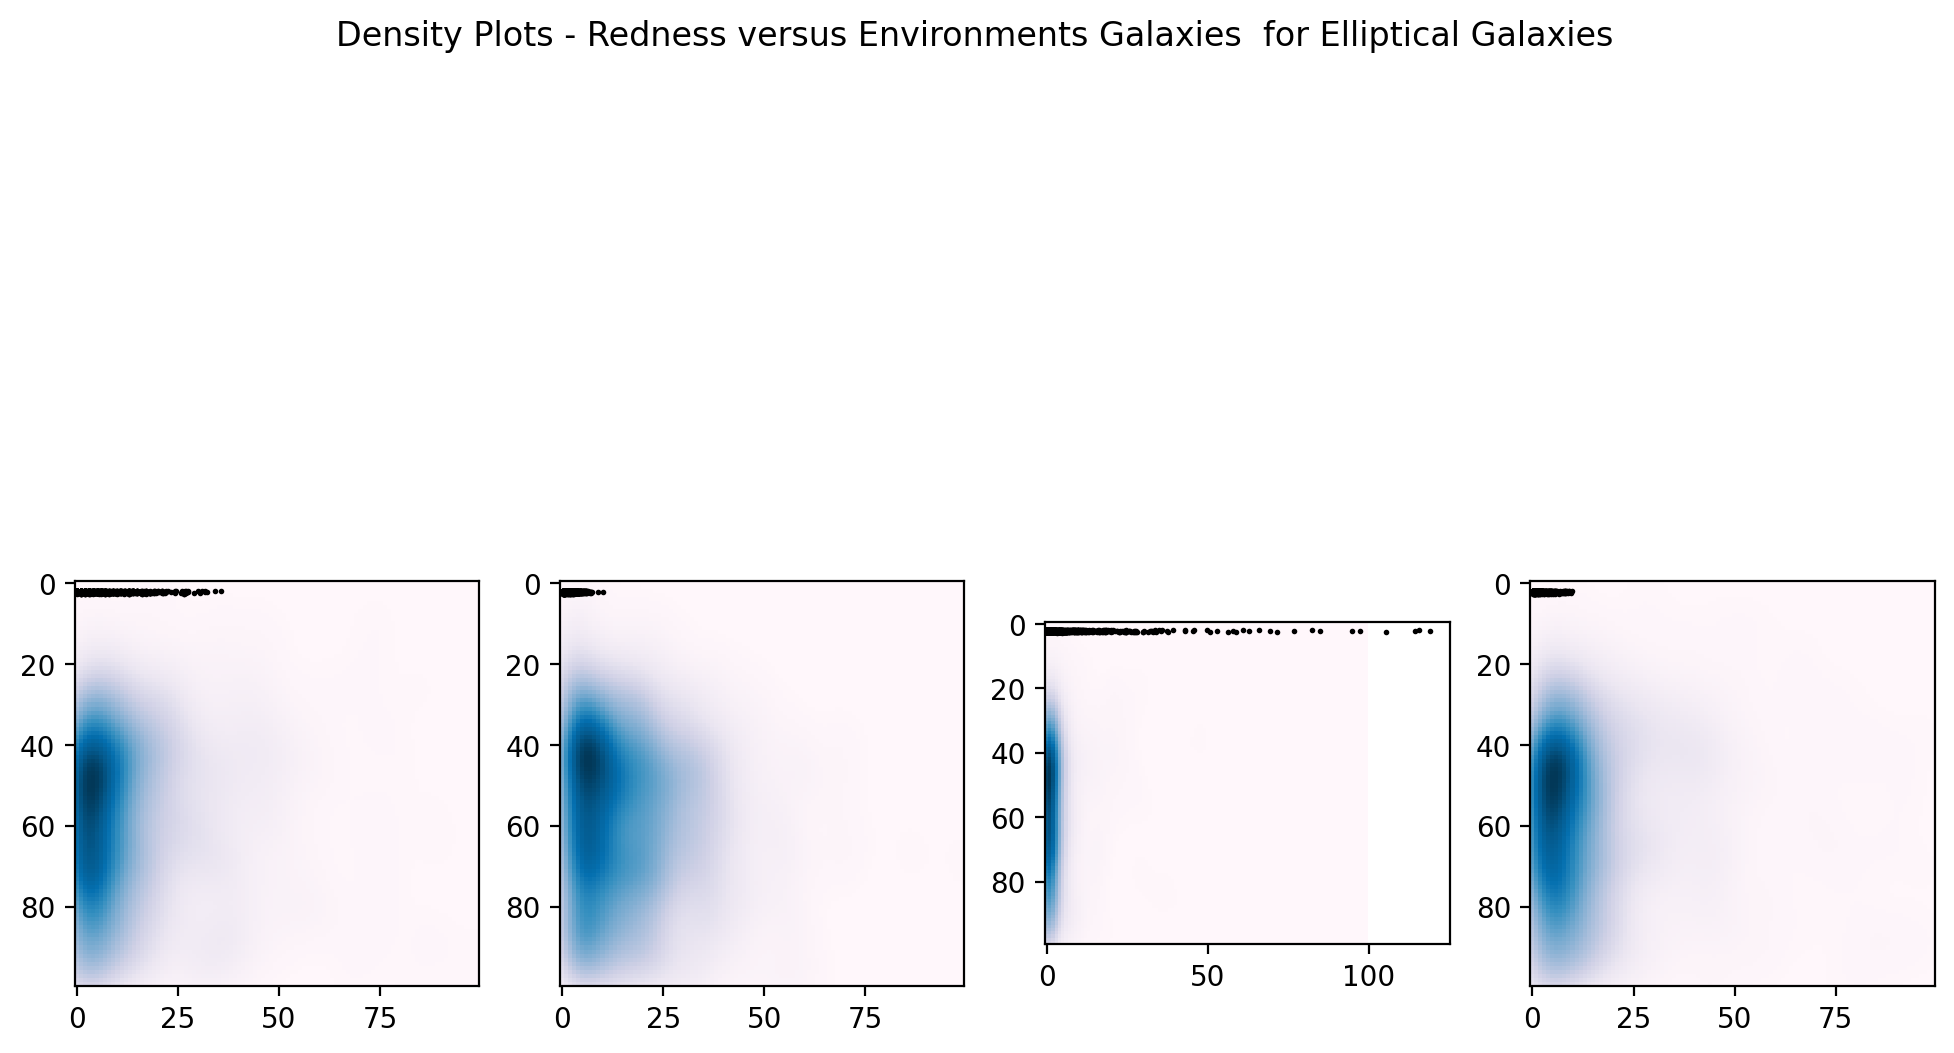

1.801203
2.7112923


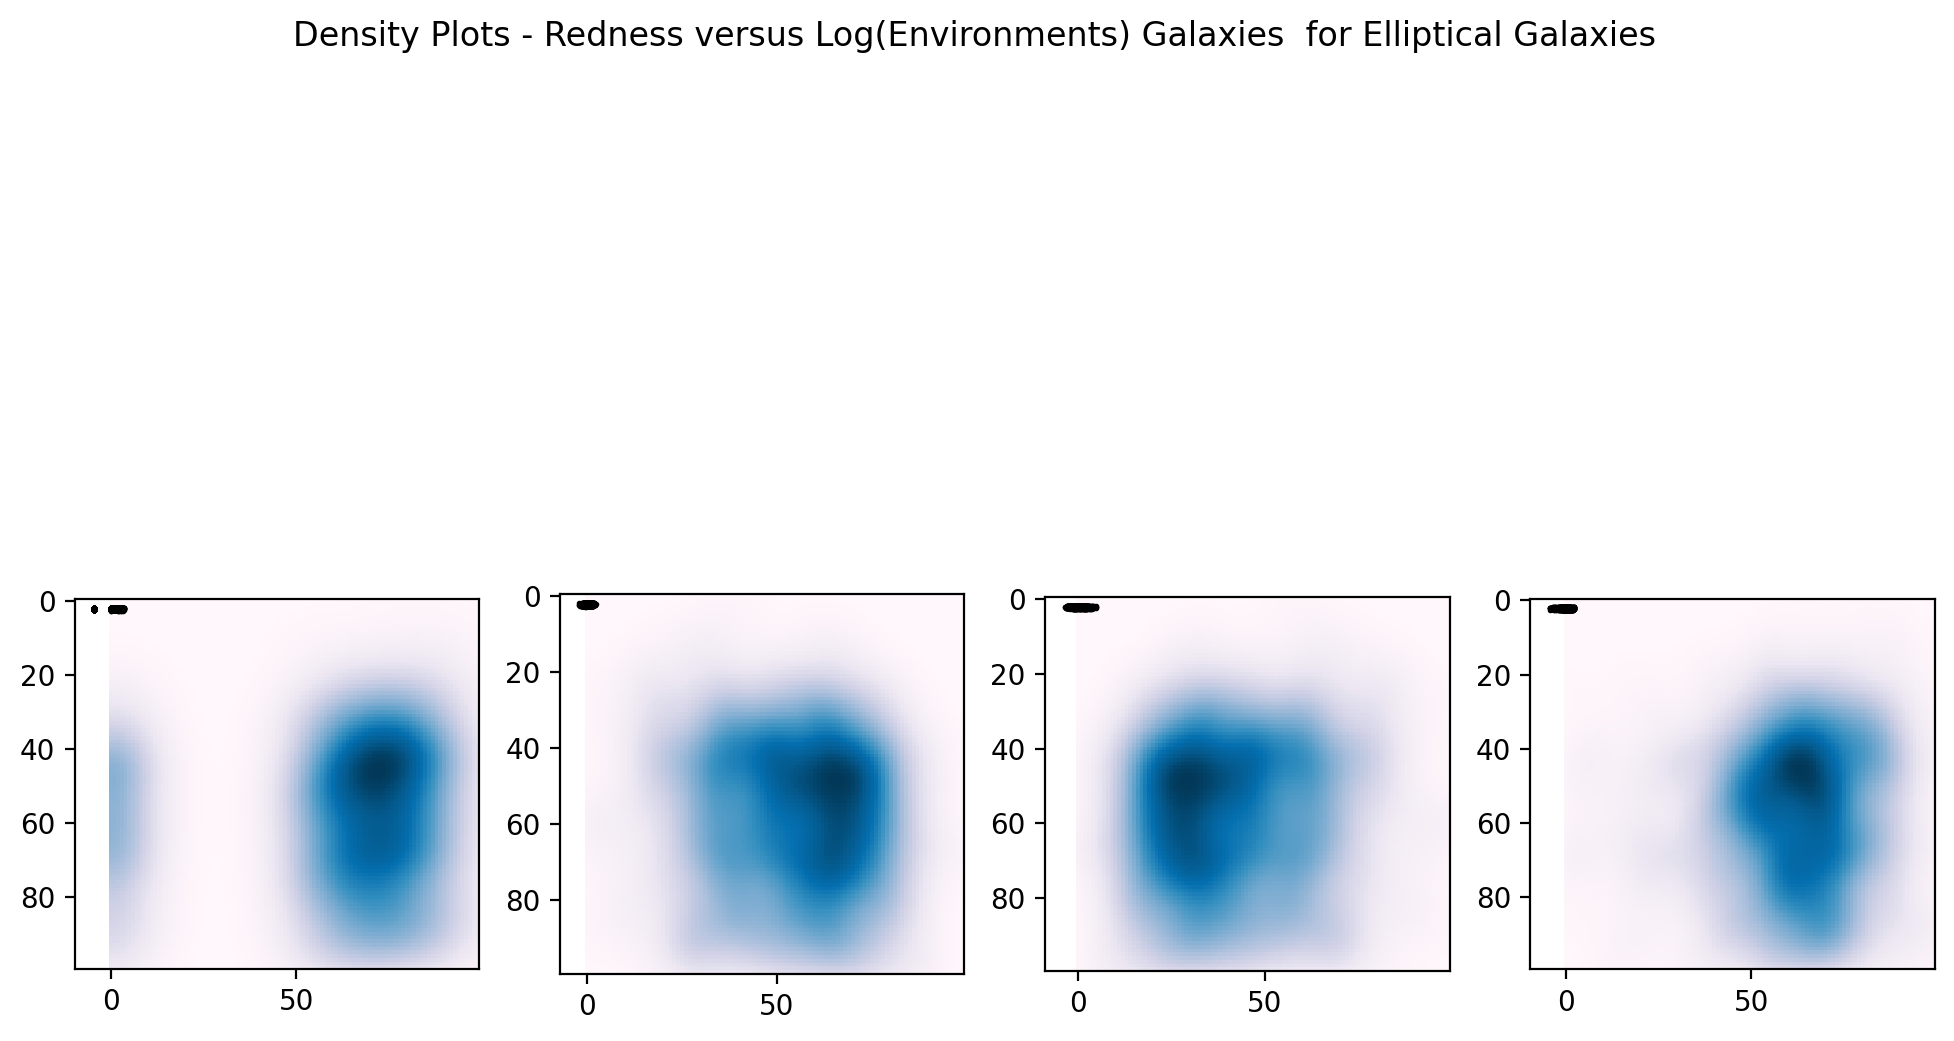

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

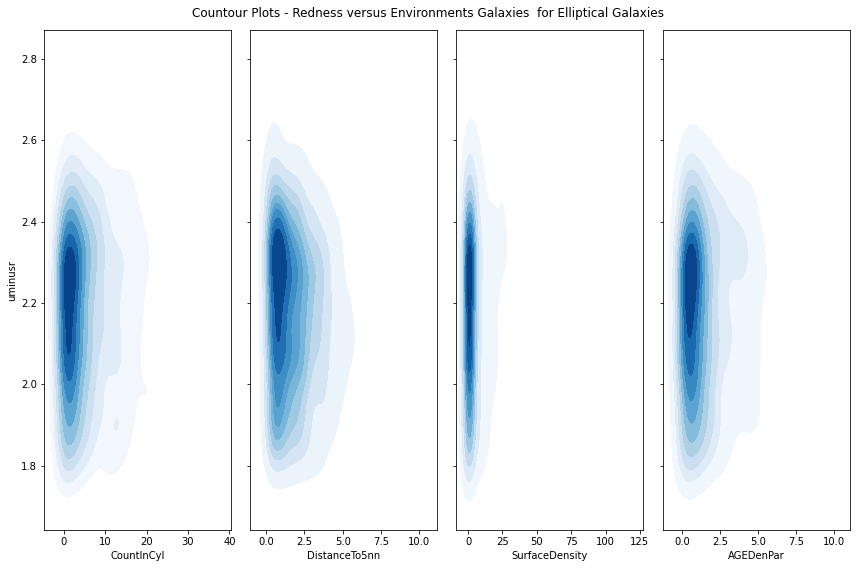

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

RErange = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]

yfield = 'uminusr'
alphaVal = .3


fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = RErange[xfield]
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()


fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = np.log(RErange[xfield])
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

#RErange1 = REMassEClassEmeasure
fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Density Plots - Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    #ax.set_ylabel(yfield)
    #ax.set_xlabel(xfield)
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Density Plots - Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    #ax.set_ylabel(yfield)
    #ax.set_xlabel(xfield)
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
plt.show()

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
fig.suptitle('Countour Plots - Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0      
y = RErange[yfield]
df = RErange.to_pandas()
for xfield in xfields :
    sns.kdeplot(df[xfield], df.uminusr, ax = axes[i], cmap='Blues', fill=True)
    i += 1           
fig.tight_layout()   
plt.show()                            


